In [65]:
# import necessary libraries
import pandas as pd
import re, string
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

In [12]:
# load the data
path="/Users/yingyuxuan/Desktop/projects/Chatbot_project_NLP_DeepLearning(RNN)/hard_coded_chatbot/"
df=pd.read_csv(path+"chatbot_data_Q&A - basic_python_questions.csv")

In [13]:
# first five rows
df.head()

,question,answer
0,data?,Based on the definition from google : facts an...
1,what is data science?,Data science is an inter-disciplinary field th...
2,data science,Data science is an inter-disciplinary field th...
3,what is big data?,"In the data science domain, big data usually r..."
4,definition of big data,"In the data science domain, big data usually r..."


In [14]:
# check the missing values 
df.isnull().sum()



question     3
answer      11
dtype: int64

In [15]:
#and remove missing values
df=df.dropna()

In [16]:
#let us check the data again
df.isnull().sum() # cool we removed all missing values

question    0
answer      0
dtype: int64

In [17]:
df.shape # there are 118 rows and 2 columns

(118, 2)

In [18]:
# let us create a function to reverse some abbravations
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r'[-()\"#/@;:<>{}`+=~|.!?,]\|', "", text)
    text=text.replace("[\'","").replace("\n"," ").replace("']"," ").replace('["',"").replace('"]',"").replace("it\'s","it's ").replace("\', \'","")
    text=text.replace("\',","").replace("it\'s","it is ").replace("it\\\'s","it is").replace(" \\"," ")
    text=text.replace('",'," ").replace("\',","").replace( ":\',","").replace("here\'s","").replace(":","").replace(',"',"")
    text=text.replace("[","").replace("]","").replace("\'s","'s")
    text=re.sub(r"let's", "let us", text)
    text = text.replace("\'s", "")
    return text

In [21]:
#declare answers and questions
questions=df.question
answers=df.answer
# Cleaning the questions
clean_questions = []
for question in questions:
    clean_questions.append(clean_text(question))
# Cleaning the answers
clean_answers = []
for answer in answers:
    clean_answers.append(clean_text(answer))

In [31]:
# list contains  punctuation
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©',
'said',"'s", "also",'one',"n't",'com', '-', '–','--' ,
'—', '_']
sw_set = set(sw_list)

# tokenization
def process_data(string):
    tokens = nltk.word_tokenize(string) # tokenization
    punctuation_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return punctuation_removed

# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
# create a function stemming() and loop through each word in a review
def stemming(string):
    stemmed_string=[]
    for w in string:
        stemmed_string.append(ps.stem(w))
    return stemmed_string

# import libraries
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# create a function  and loop through each word in  a review
def lemmatization(string):
    lemma_list=[]
    for word in string:
        lemma_word=lemmatizer.lemmatize(word,pos='v') 
        lemma_list.append(lemma_word)
    return lemma_list

# Conbime all functions above and obtian cleaned text data 
def data_preprocessing(text_data):
    #tokenization, stop words removal, punctuation marks removel
    processed_string=list(map(process_data,text_data))
    # stemming
    stemming_string=list(map(stemming,processed_string))
    # lemmatization
    lemma_string=list(map(lemmatization,stemming_string))
    
    return lemma_string


In [32]:
# using the function above to process the data 
cleaned_questions=data_preprocessing(clean_questions)

In [39]:
cleaned_questions[:10] 
# seems that each element is a list but we want to merge each element in each list 

[['data'],
 ['data', 'scienc'],
 ['data', 'scienc'],
 ['big', 'data'],
 ['definit', 'big', 'data'],
 ['big', 'data'],
 ['famou', 'data', 'scientist'],
 ['matplotlib'],
 ['seaborn'],
 ['panda']]

In [46]:
# we merged data
merged_data=[]
for i in range(len(cleaned_questions)):
    merged_data.append(" ".join(cleaned_questions[i]))

In [70]:
# let us take a look at first 5 elements
merged_data[:10]

['data',
 'data scienc',
 'data scienc',
 'big data',
 'definit big data',
 'big data',
 'famou data scientist',
 'matplotlib',
 'seaborn',
 'panda']

In [59]:
# Bigrams 
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def bigram_dictionary(data,n=None):
    words_freq=get_top_n_bigram(data,n)
    
    dictionary={}
    for i in range(len(words_freq)):
        dictionary[words_freq[i][0]]=words_freq[i][1]
    return dictionary
#source:https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a


In [62]:
BOW= bigram_dictionary(merged_data, 30)# get top 30 
BOW 

{'data scienc': 6,
 'numer data': 5,
 'element list': 4,
 'use panda': 4,
 'big data': 3,
 'data visual': 3,
 'select column': 3,
 'plot seaborn': 3,
 'linear regress': 3,
 'data scientist': 2,
 'instal anaconda': 2,
 'categor data': 2,
 'list python': 2,
 'add element': 2,
 'plot bar': 2,
 'bar chart': 2,
 'scatter plot': 2,
 'directori bash': 2,
 'bash shell': 2,
 'capit letter': 2,
 'letter string': 2,
 'number list': 2,
 'list arrari': 2,
 'common python': 2,
 'python librari': 2,
 'data use': 2,
 'row datafram': 2,
 'index datafram': 2,
 'definit data': 2,
 'definit big': 1}

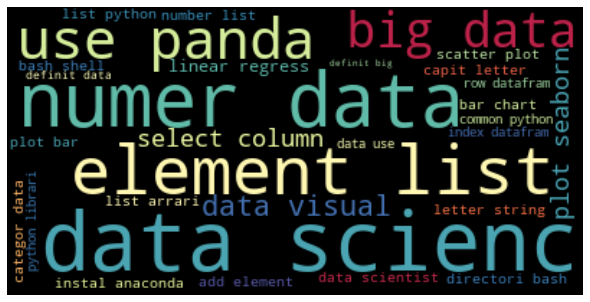

In [73]:
# import word cloud library and plot !
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(BOW)
plt.figure(figsize=(8,10), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#save BOW as CSV file
BOW_df=pd.DataFrame()
    BOW_df['word']
    BOW_df[""]